Import packages

In [3]:
#
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Reset graph

In [4]:
#
tf.reset_default_graph()

Data

In [5]:
# Generate 3D dataset
np.random.seed(4)
m = 200
w1, w2 = 0.1, 0.3
noise =0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
data = np.empty((m, 3))
data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m)/2
data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)

In [6]:
#
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [7]:
#
X_train = scalar.fit_transform(data[:100])
X_test  = scalar.transform(data[100:])

Visualize X_train in a 3D scatter plot

In [8]:
from mpl_toolkits.mplot3d import Axes3D

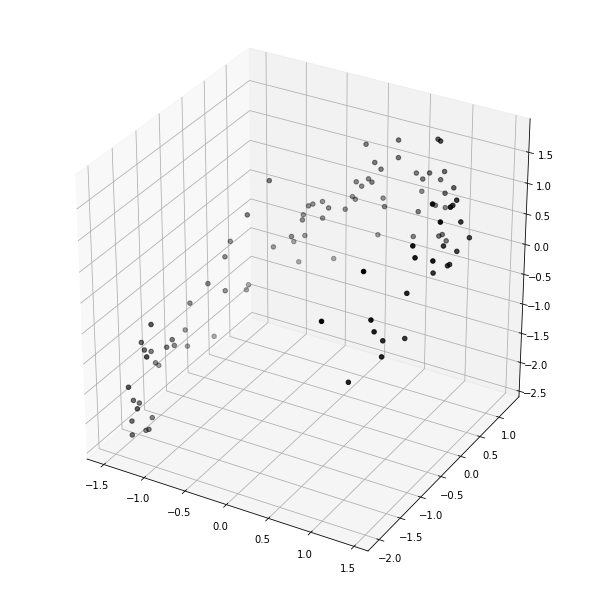

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = Axes3D(fig)
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c='k')

# Autoencoder

Create a linear autoencoder to reduce data to 2 dimensions. This autoencoder is actually simulating PCA.

In [16]:
X = tf.placeholder(dtype=tf.float32, shape=(None, 3), name='X')

In [17]:
with tf.name_scope('NN'):
    coder = tf.layers.dense(X, 2, activation=None, name='coder')
    output = tf.layers.dense(coder, 3, activation=None, name='output')

In [19]:
with tf.name_scope('loss'):
    error = tf.square(output-X)
    mse = tf.reduce_mean(error)

In [20]:
with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer()
    train_op = optimizer.minimize(mse, name='train_op')
    

Execute the training by 1000 iterations. Then decode X_test

In [22]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        sess.run(train_op, feed_dict={X:X_train})
    X_reduced = sess.run(coder, feed_dict={X:X_test})

Visualize the decoded data from X_test in 2D scatter plot

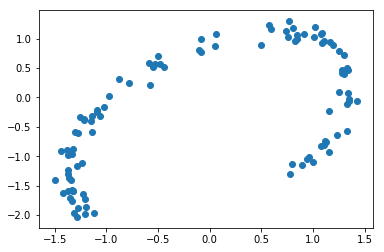

In [25]:
plt.scatter(X_test[:, 0], X_test[:, 1])

# PCA

Use PCA to redo the work. Plot the result in a 2D scatter plot

In [26]:
from sklearn.decomposition import PCA

In [29]:
reducer = PCA(n_components=2)

In [30]:
reducer.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
X_reduced_2 = reducer.transform(X_test)

In [32]:
X_reduced_2.shape

(100, 2)

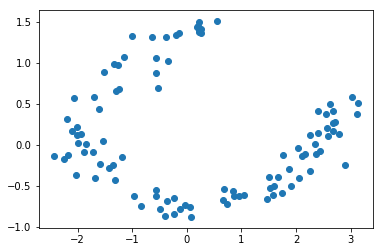

In [38]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1])